In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv('train_dataset.csv')
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [9]:
df_train.shape

(10000, 24)

### Tarkib:
* Gender: yo'lovchilarning jinsi (ayol, erkak)

* Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

* Age: yo'lovchilarning haqiqiy yoshi

* Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)
 
* Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)
 
* Flight distance: Ushbu sayohatning parvoz masofasi
 
* Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)
 
* Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

* Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi
 
* Gate location: Darvoza joylashuvidan qoniqish darajasi
 
* Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi
 
* Online boarding: Onlayn bortdan qoniqish darajasi
 
* Seat comfort: O'rindiqning qulayligidan qoniqish darajasi
 
* Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi
 
* On-board service: Bort xizmatidan qoniqish darajasi
 
* Leg room service: oyoq xonasi xizmatidan qoniqish darajasi
 
* Baggage handling: bagajni tashishdan qoniqish darajasi
 
* Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi
 
* Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi
 
* Cleanliness: Tozalikdan qoniqish darajasi
 
* Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari
 
* Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari
 
* Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [10]:
df_train.drop('id',axis=1,inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int6

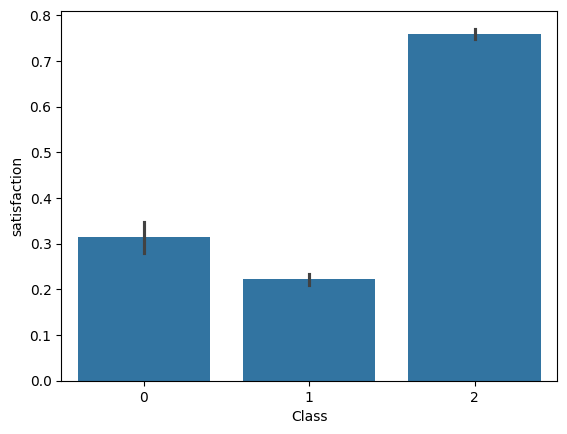

In [48]:
sns.barplot(data=df_train,x=df_train['Class'],y=df_train['satisfaction'])
plt.show()

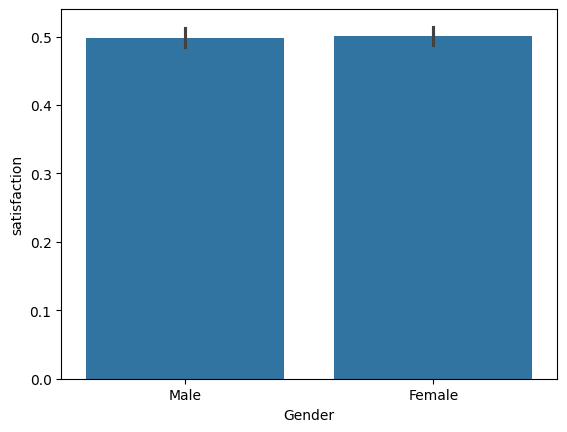

In [13]:
sns.barplot(data=df_train,x='Gender',y='satisfaction')
plt.show()

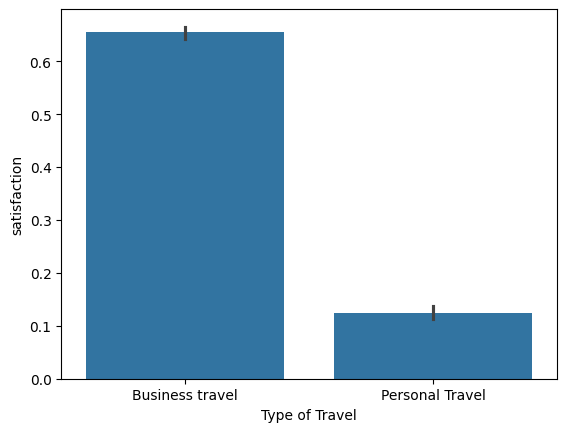

In [14]:
sns.barplot(data=df_train,x='Type of Travel',y='satisfaction')
plt.show()

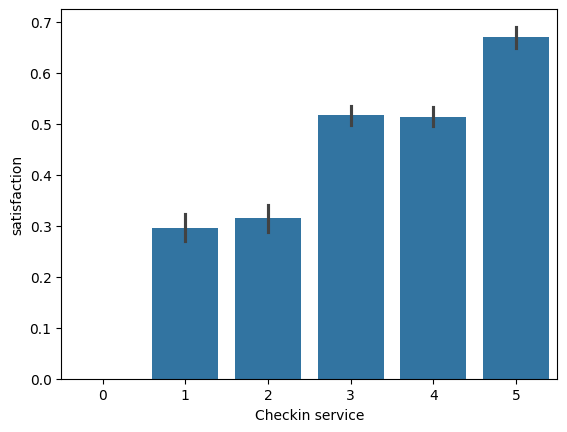

In [15]:
sns.barplot(data=df_train,x='Checkin service',y='satisfaction')
plt.show()

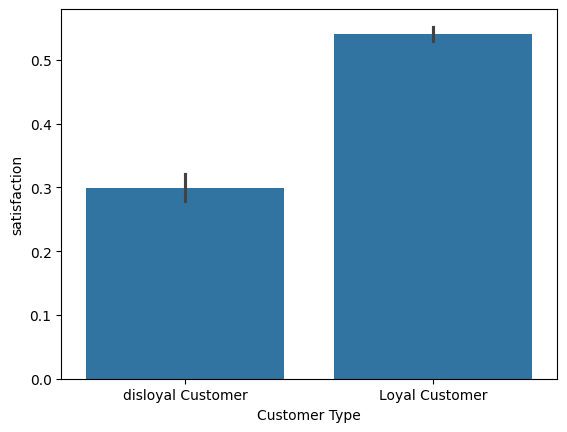

In [16]:
sns.barplot(data=df_train,x='Customer Type',y='satisfaction')
plt.show()

Text(0.5, 0, 'Age')

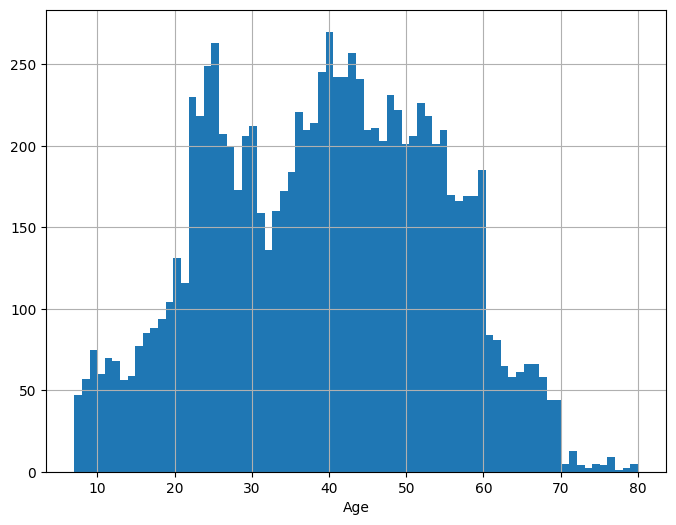

In [56]:
plt.figure(figsize=(8, 6))
df_train.Age.hist(bins=df_train.Age.nunique())
plt.xlabel('Age')
plt.show()

<Figure size 800x600 with 0 Axes>

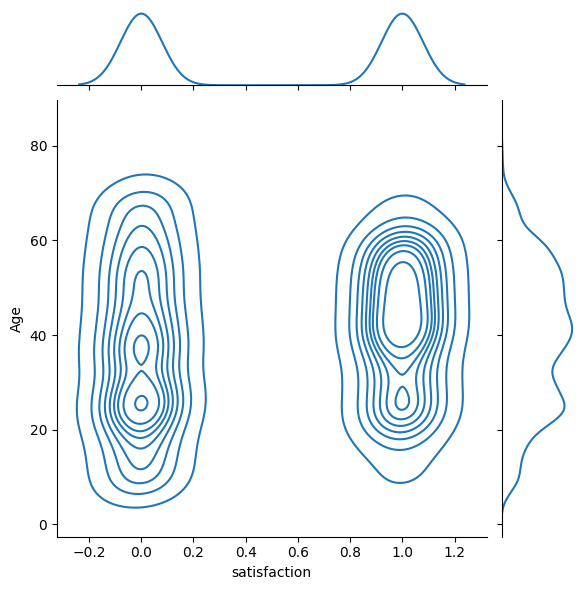

In [57]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df_train['satisfaction'], y=df_train.Age, kind='kde')

### Gender

In [17]:
df_train['Gender'].value_counts()

Gender
Female    5169
Male      4831
Name: count, dtype: int64

In [18]:
def mapp(x:pd.Series,y:dict):
  return x.map(y)

In [19]:
df_train['Gender'] = mapp(df_train['Gender'],{'Male':0,'Female':1})

In [20]:
df_train.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7221,0,Loyal Customer,48,Business travel,Business,2426,3,3,3,3,...,2,2,2,2,5,2,3,0,0.0,1


### Customer Type

In [21]:
df_train['Customer Type'].value_counts()

Customer Type
Loyal Customer       8307
disloyal Customer    1693
Name: count, dtype: int64

In [22]:
df_train['Customer Type'] = mapp(df_train['Customer Type'],{'disloyal Customer':0,'Loyal Customer':1})

In [23]:
df_train.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2246,0,1,27,Personal Travel,Eco,1012,4,4,4,1,...,5,4,2,2,3,1,5,63,84.0,0


### Type of Travel

In [24]:
df_train['Type of Travel'].value_counts()

Type of Travel
Business travel    7079
Personal Travel    2921
Name: count, dtype: int64

In [25]:
df_train['Type of Travel'] = mapp(df_train['Type of Travel'],{'Personal Travel':0,'Business travel':1})

In [26]:
df_train.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7086,1,0,37,1,Business,2475,1,1,1,3,...,3,3,4,4,3,3,3,11,16.0,0


### Class

In [27]:
df_train['Class'].value_counts()

Class
Business    5048
Eco         4251
Eco Plus     701
Name: count, dtype: int64

In [28]:
df_train['Class'] = mapp(df_train['Class'],{'Eco Plus':0,'Eco':1,'Business':2})

In [29]:
df_train.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7663,0,1,18,0,1,1562,1,5,0,3,...,4,5,5,2,3,2,4,49,39.0,0


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int6

In [31]:
df_train.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [32]:
df_train[df_train['Arrival Delay in Minutes'].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
142,0,1,25,1,2,2685,2,2,2,2,...,4,4,4,4,5,5,5,175,NaN,1
277,1,1,63,1,2,3104,3,2,3,3,...,4,4,4,4,4,4,3,0,NaN,1
281,1,1,40,1,1,1214,4,3,3,3,...,4,2,2,4,3,1,4,110,NaN,1
427,0,1,70,0,1,298,2,4,2,3,...,1,3,2,4,3,5,1,0,NaN,0
477,1,1,8,0,2,842,3,5,3,5,...,3,2,5,4,5,1,3,5,NaN,0
481,0,0,30,1,1,737,4,4,4,3,...,2,5,1,4,1,3,2,22,NaN,0
531,0,1,63,0,1,436,3,5,3,3,...,1,5,2,5,3,4,1,64,NaN,0
1514,0,1,32,1,2,1737,3,2,2,2,...,3,1,4,4,1,3,3,42,NaN,0
2087,1,1,20,1,2,2370,2,2,2,2,...,3,5,4,5,3,5,3,60,NaN,1
2333,0,1,24,0,1,2681,1,2,1,4,...,3,3,1,4,1,4,3,92,NaN,0


In [33]:
df_train.corrwith(df_train['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Type of Travel                       0.482266
Class                                0.463430
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Gate location                        0.007169
Gender                               0.002601
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes          

In [34]:
df_train.dropna(axis=0,inplace=True)

In [35]:
df_train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [36]:
df_train.shape

(9972, 23)

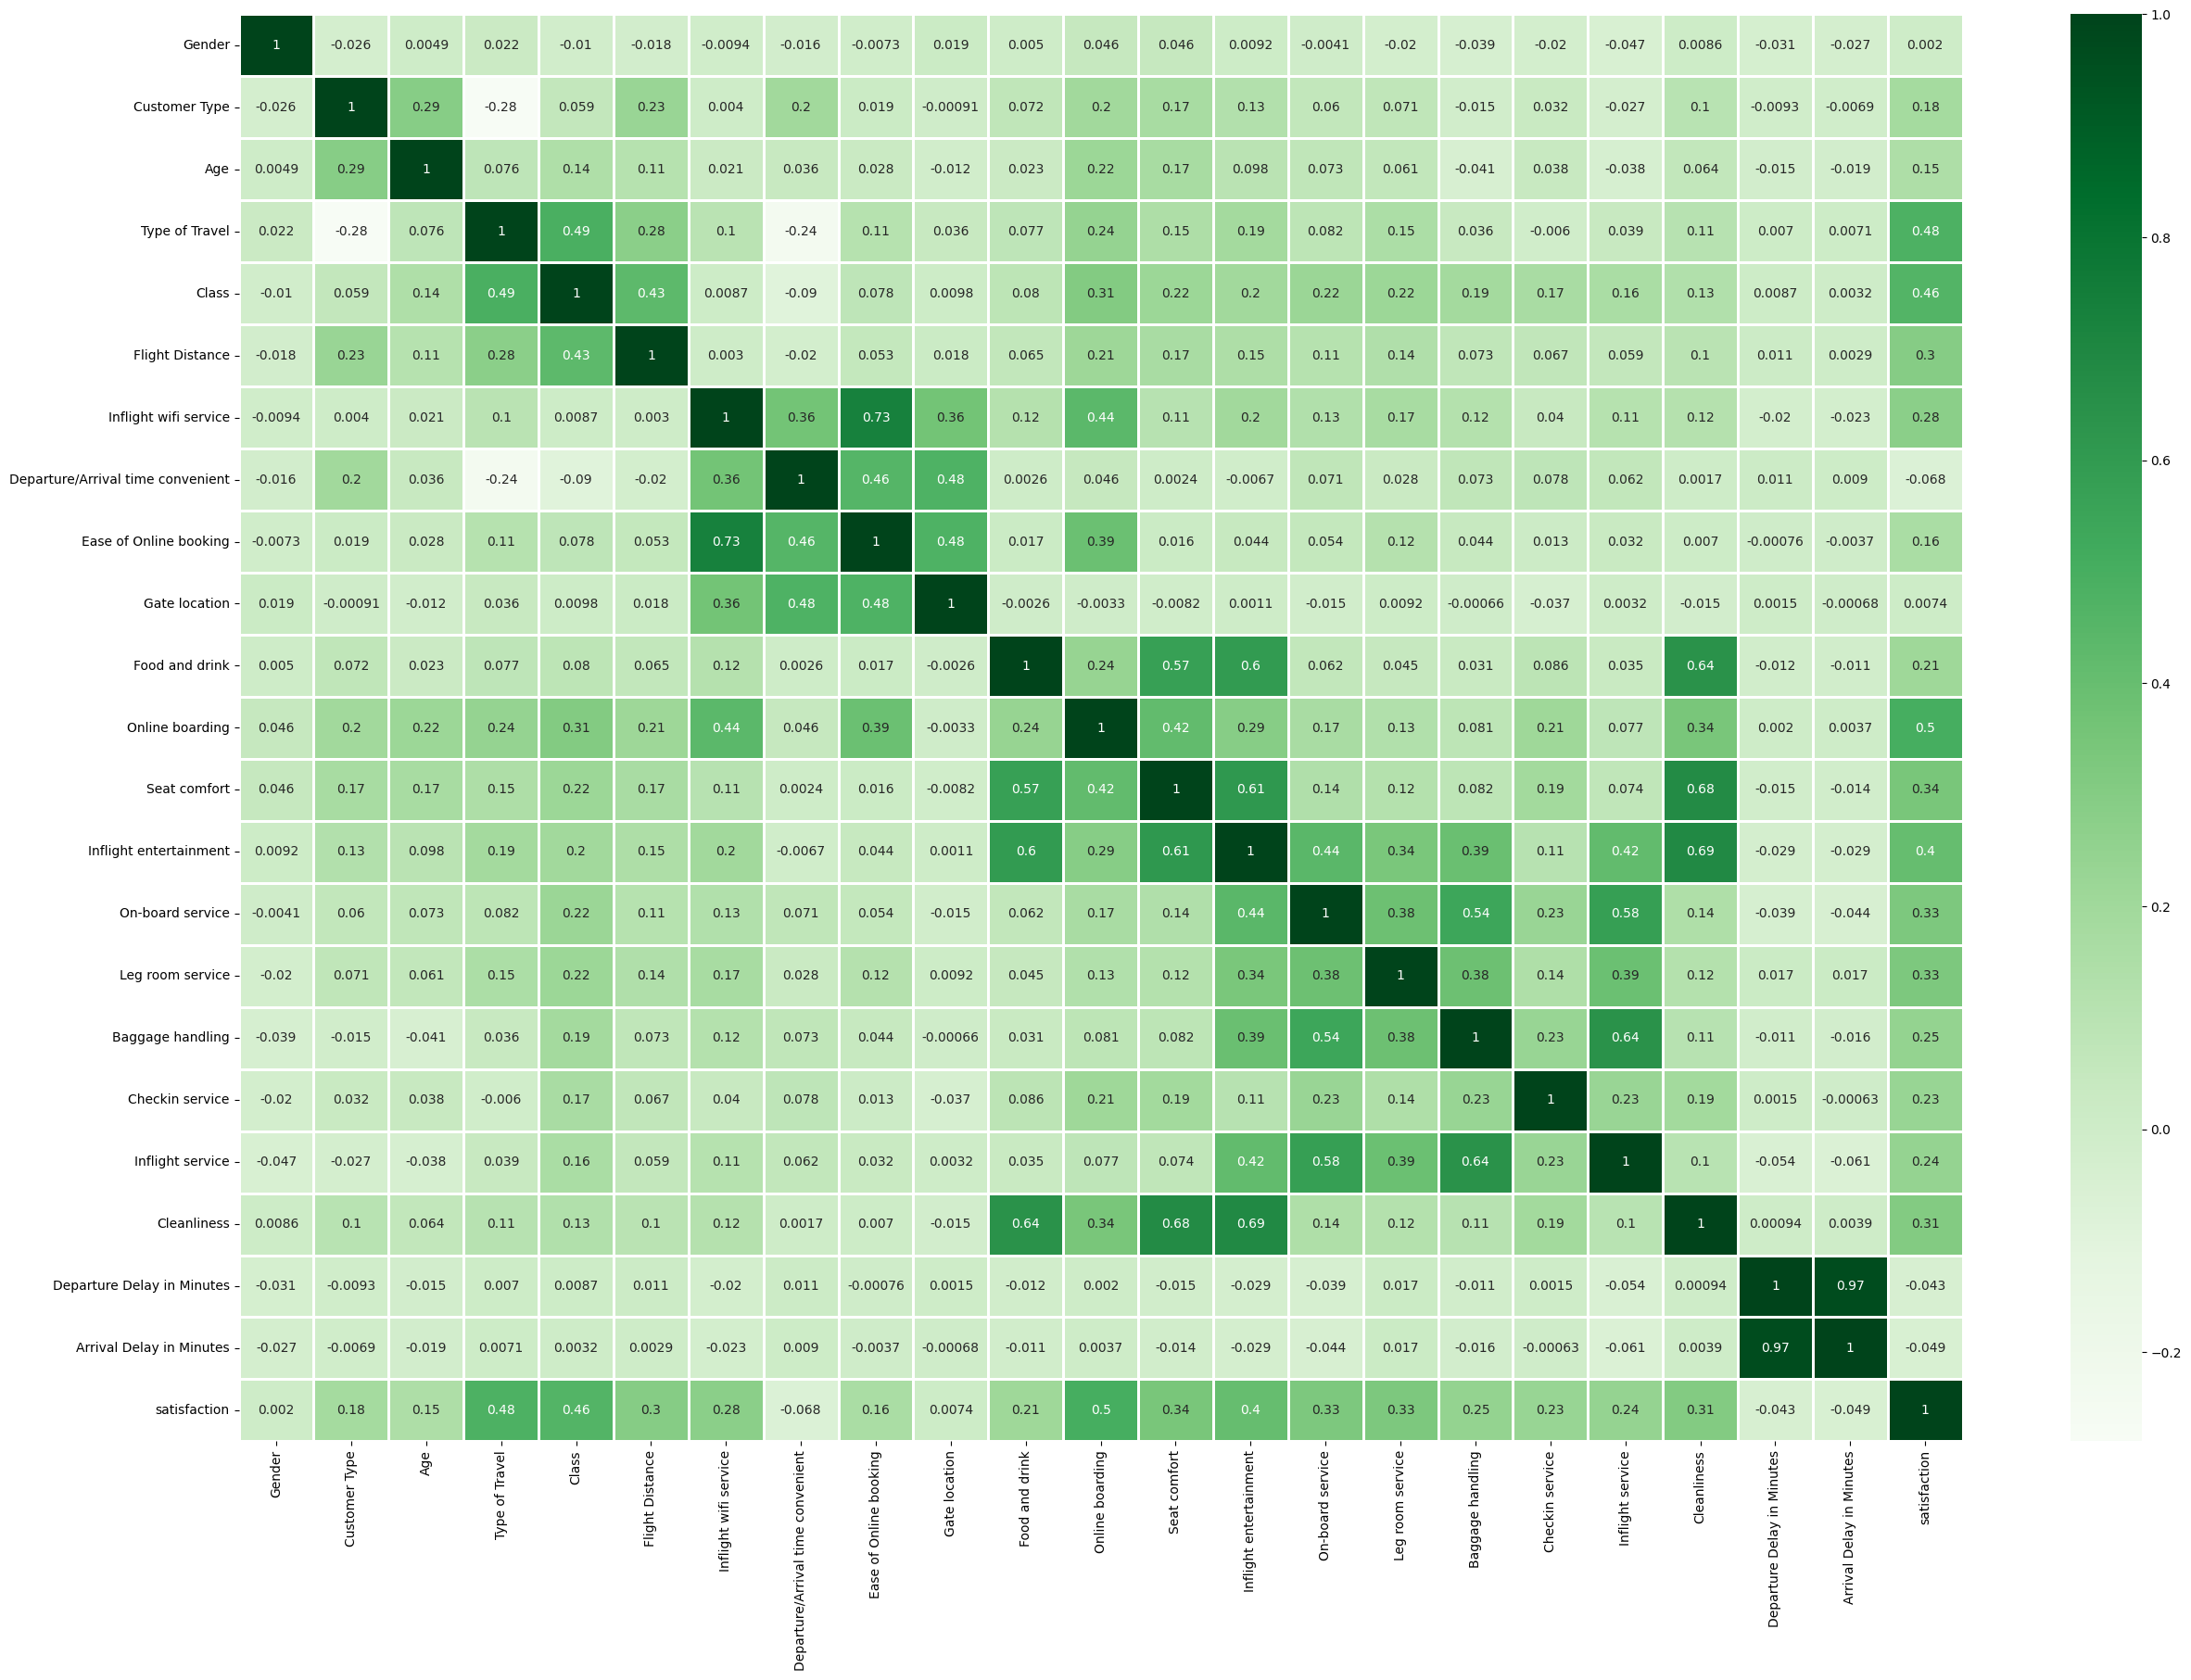

In [37]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot = True,linecolor='white',linewidths=2,cmap='Greens')
plt.show()

In [38]:
df_train.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1702,0,0,43,1,1,163,1,3,1,2,...,4,3,4,3,4,5,4,43,33.0,0


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9972 non-null   int64  
 1   Customer Type                      9972 non-null   int64  
 2   Age                                9972 non-null   int64  
 3   Type of Travel                     9972 non-null   int64  
 4   Class                              9972 non-null   int64  
 5   Flight Distance                    9972 non-null   int64  
 6   Inflight wifi service              9972 non-null   int64  
 7   Departure/Arrival time convenient  9972 non-null   int64  
 8   Ease of Online booking             9972 non-null   int64  
 9   Gate location                      9972 non-null   int64  
 10  Food and drink                     9972 non-null   int64  
 11  Online boarding                    9972 non-null   int64  
 1

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_train.drop('satisfaction',axis=1).values
y = df_train['satisfaction']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

In [44]:
print("TRAIN DATA")
print(X_train.shape)
print(y_train.shape)

TRAIN DATA
(7977, 22)
(7977,)


In [49]:
print("TEST DATA")
print(X_test.shape)
print(y_test.shape)

TEST DATA
(1995, 22)
(1995,)


## TRAIN

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [98]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        sns.heatmap(confusion_matrix(y_train, pred),annot=True,linewidths=2,cmap='Greens',center=4)
        plt.show()

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        sns.heatmap(confusion_matrix(y_test, pred),annot=True,linewidths=2,cmap='Blues',center=4)
        plt.show()

#### LinearRegression

In [83]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 86.95%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.865232     0.873888    0.8695     0.869560      0.869553
recall        0.875845     0.863134    0.8695     0.869489      0.869500
f1-score      0.870506     0.868478    0.8695     0.869492      0.869494
support    3995.000000  3982.000000    0.8695  7977.000000   7977.000000
_______________________________________________
Confusion Matrix: 
 [[3499  496]
 [ 545 3437]]



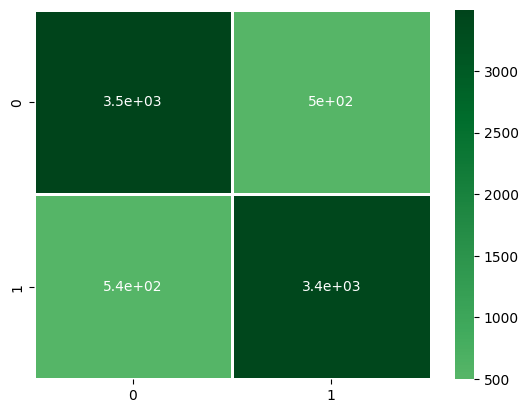

In [91]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 87.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.862648     0.879959  0.871178     0.871304      0.871360
recall       0.880928     0.861554  0.871178     0.871241      0.871178
f1-score     0.871692     0.870659  0.871178     0.871176      0.871173
support    991.000000  1004.000000  0.871178  1995.000000   1995.000000
_______________________________________________
Confusion Matrix: 
 [[873 118]
 [139 865]]



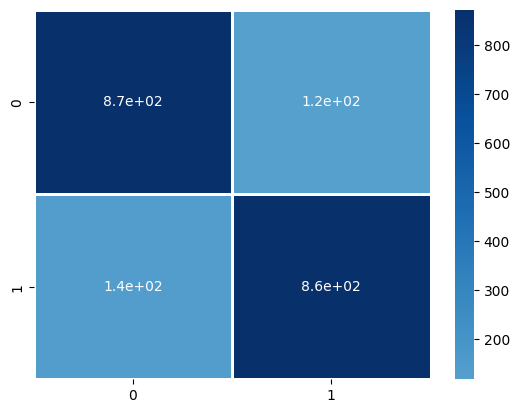

In [99]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [119]:
print(cross_val_score(lr_clf, X_test, y_test, cv=5, scoring='accuracy').mean())

0.8631578947368421


### KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

Train Result:
Accuracy Score: 74.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.747891     0.751457  0.749655     0.749674      0.749671
recall        0.754443     0.744852  0.749655     0.749647      0.749655
f1-score      0.751153     0.748140  0.749655     0.749646      0.749649
support    3995.000000  3982.000000  0.749655  7977.000000   7977.000000
_______________________________________________
Confusion Matrix: 
 [[3014  981]
 [1016 2966]]



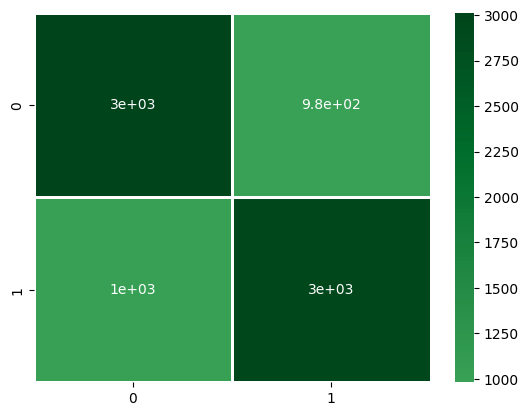

In [121]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 67.37%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.667984     0.679552  0.673684     0.673768      0.673806
recall       0.682139     0.665339  0.673684     0.673739      0.673684
f1-score     0.674988     0.672370  0.673684     0.673679      0.673670
support    991.000000  1004.000000  0.673684  1995.000000   1995.000000
_______________________________________________
Confusion Matrix: 
 [[676 315]
 [336 668]]



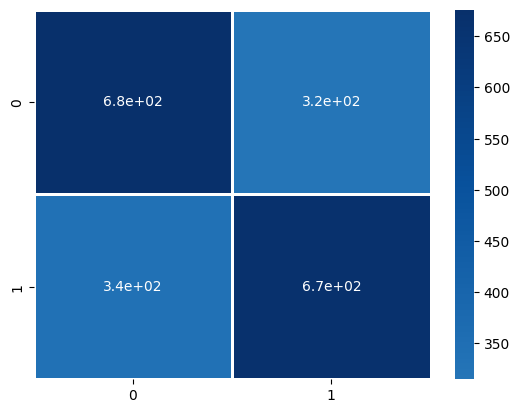

In [124]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

In [123]:
print(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean())

0.6300751879699249


### DecisionTreeClassifier

In [125]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3995.0  3982.0       1.0     7977.0        7977.0
_______________________________________________
Confusion Matrix: 
 [[3995    0]
 [   0 3982]]



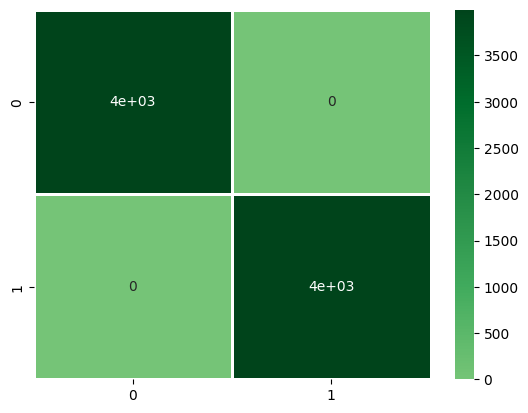

In [126]:
print_score(dt_clf,X_train,y_train,X_test,y_test,train=True)

Test Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.929364     0.930279  0.929825     0.929822      0.929825
recall       0.929364     0.930279  0.929825     0.929822      0.929825
f1-score     0.929364     0.930279  0.929825     0.929822      0.929825
support    991.000000  1004.000000  0.929825  1995.000000   1995.000000
_______________________________________________
Confusion Matrix: 
 [[921  70]
 [ 70 934]]



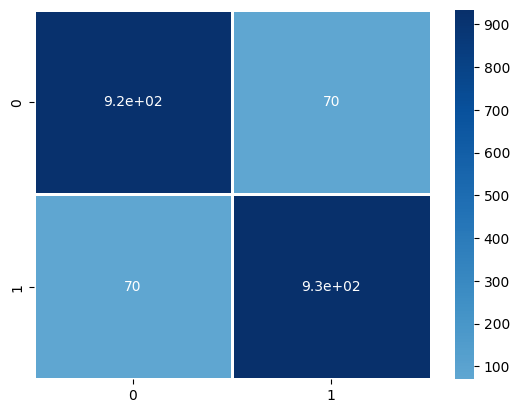

In [127]:
print_score(dt_clf,X_train,y_train,X_test,y_test,train=False)

In [128]:
print(cross_val_score(dt_clf, X_test, y_test, cv=5, scoring='accuracy').mean())

0.8952380952380953


### RandomForestClassifier

In [153]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [156]:
best_rfc = RandomForestClassifier(random_state=42)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [194]:
best_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
best_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_rfc.best_score_

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3995.0  3982.0       1.0     7977.0        7977.0
_______________________________________________
Confusion Matrix: 
 [[3995    0]
 [   0 3982]]



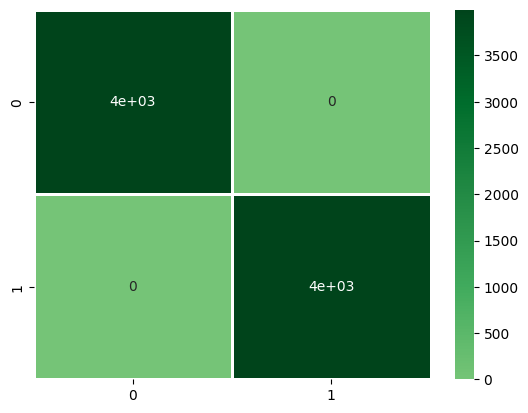

In [157]:
print_score(best_rfc,X_train,y_train,X_test,y_test,train=True)

Test Result:
Accuracy Score: 94.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.938185     0.949597   0.94386     0.943891      0.943928
recall       0.949546     0.938247   0.94386     0.943896      0.943860
f1-score     0.943831     0.943888   0.94386     0.943860      0.943860
support    991.000000  1004.000000   0.94386  1995.000000   1995.000000
_______________________________________________
Confusion Matrix: 
 [[941  50]
 [ 62 942]]



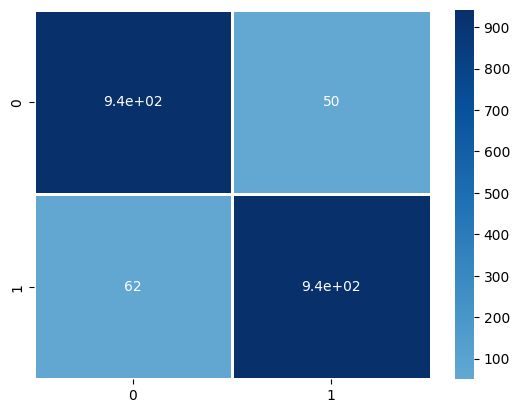

In [158]:
print_score(best_rfc,X_train,y_train,X_test,y_test,train=False)

In [159]:
print(cross_val_score(best_rfc, X_test, y_test, cv=5, scoring='accuracy').mean())

0.930827067669173


### GradientBoostingClassifier

In [161]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

Train Result:
Accuracy Score: 94.77%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.939342     0.956466  0.947725     0.947904      0.947890
recall        0.957447     0.937971  0.947725     0.947709      0.947725
f1-score      0.948308     0.947128  0.947725     0.947718      0.947719
support    3995.000000  3982.000000  0.947725  7977.000000   7977.000000
_______________________________________________
Confusion Matrix: 
 [[3825  170]
 [ 247 3735]]



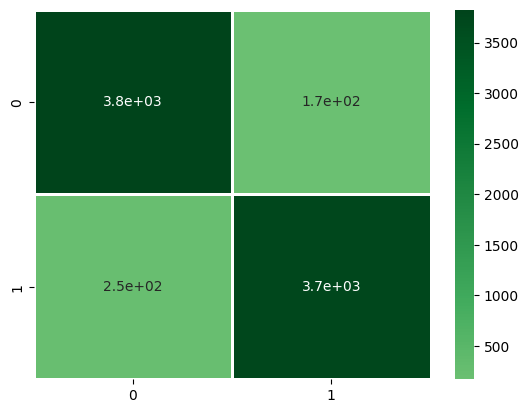

In [162]:
print_score(gb_clf,X_train,y_train,X_test,y_test,train=True)

Test Result:
Accuracy Score: 94.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.931818     0.951170  0.941353     0.941494      0.941557
recall       0.951564     0.931275  0.941353     0.941419      0.941353
f1-score     0.941588     0.941117  0.941353     0.941352      0.941351
support    991.000000  1004.000000  0.941353  1995.000000   1995.000000
_______________________________________________
Confusion Matrix: 
 [[943  48]
 [ 69 935]]



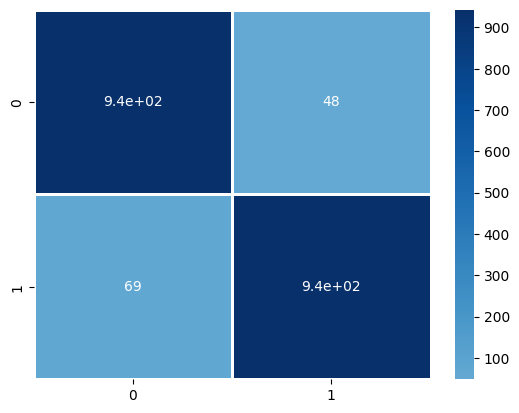

In [163]:
print_score(gb_clf,X_train,y_train,X_test,y_test,train=False)

In [231]:
print(cross_val_score(gb_clf, X_test, y_test, cv=5, scoring='accuracy').mean())

0.931829573934837


### Testset Pre-Test

In [195]:
df_test = pd.read_csv('test_dataset.csv')
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [196]:
df_test.drop('id',axis=1,inplace=True)

In [197]:
df_test['Gender'].value_counts()

Gender
Male      2013
Female    1987
Name: count, dtype: int64

In [198]:
def mapp(x:pd.Series,y:dict):
  return x.map(y)

In [199]:
df_test['Gender'] = mapp(df_test['Gender'],{'Male':0,'Female':1})

In [200]:
df_test.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3583,0,Loyal Customer,51,Personal Travel,Business,1535,1,1,1,2,...,3,4,4,1,3,1,4,2,5,0.0


### Customer Type

In [201]:
df_test['Customer Type'].value_counts()

Customer Type
Loyal Customer       3264
disloyal Customer     736
Name: count, dtype: int64

In [202]:
df_test['Customer Type'] = mapp(df_test['Customer Type'],{'disloyal Customer':0,'Loyal Customer':1})

In [203]:
df_test.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3832,1,1,40,Business travel,Business,1028,4,4,4,4,...,2,5,5,5,5,2,5,5,1,0.0


### Type of Travel

In [204]:
df_test['Type of Travel'].value_counts()

Type of Travel
Business travel    2871
Personal Travel    1129
Name: count, dtype: int64

In [205]:
df_test['Type of Travel'] = mapp(df_test['Type of Travel'],{'Personal Travel':0,'Business travel':1})

In [206]:
df_test.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3203,0,1,51,1,Business,2521,0,0,0,4,...,5,3,3,3,3,3,3,3,0,0.0


### Class

In [207]:
df_test['Class'].value_counts()

Class
Business    2030
Eco         1691
Eco Plus     279
Name: count, dtype: int64

In [208]:
df_test['Class'] = mapp(df_test['Class'],{'Eco Plus':0,'Eco':1,'Business':2})

In [209]:
df_test.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1814,0,1,21,1,2,3004,5,5,5,5,...,5,5,3,3,5,3,4,5,0,0.0
759,0,1,42,1,2,3836,3,3,4,3,...,4,5,5,4,5,3,5,4,40,36.0
2990,0,1,36,1,1,160,1,2,5,2,...,1,1,1,3,3,4,2,1,0,0.0
2440,1,1,44,0,1,152,3,5,3,3,...,5,1,1,3,1,3,1,4,35,35.0
851,0,1,29,1,2,528,1,1,4,1,...,4,4,4,2,4,3,5,4,0,0.0


In [210]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Customer Type                      4000 non-null   int64  
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   int64  
 4   Class                              4000 non-null   int64  
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [211]:
df_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [226]:
df_test[df_test['Arrival Delay in Minutes'].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
42,1,1,27,1,2,2192,1,1,5,1,...,2,2,3,3,4,5,5,2,42,NaN
393,0,1,45,0,1,2565,2,3,2,2,...,4,4,3,2,2,4,2,4,7,NaN
457,0,1,61,1,2,1201,4,2,5,2,...,3,4,4,4,4,2,4,1,14,NaN
487,1,1,27,1,2,2192,1,1,5,1,...,2,2,3,3,4,5,5,2,42,NaN
563,1,0,21,1,1,1246,4,4,4,3,...,2,3,4,5,5,5,5,3,106,NaN
723,0,1,45,0,1,2565,2,3,2,2,...,4,4,3,2,2,4,2,4,7,NaN
850,0,1,31,0,1,1325,4,5,4,2,...,5,1,4,5,3,3,4,1,0,NaN
857,0,1,47,0,1,190,1,4,1,3,...,5,5,4,2,5,3,4,5,1,NaN
1625,1,0,21,1,1,1246,4,4,4,3,...,2,3,4,5,5,5,5,3,106,NaN
1762,1,1,26,1,2,2417,3,1,3,3,...,4,4,3,4,5,1,5,4,0,NaN


In [227]:
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(method='ffill')

In [228]:
df_test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [229]:
df_test.shape

(4000, 22)

In [232]:
y_predict = gb_clf.predict(df_test.values)

In [235]:
df = pd.read_csv('sample_submission.csv')
df.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [236]:
df['satisfaction'] = y_predict

In [237]:
df.head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [243]:
df.to_csv('sample.csv',index=False)

In [244]:
df.to_csv('C:/Users/Lucas/Desktop/sample.csv',index=False)

In [1]:
import pandas as pd 
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv('sample.csv')
df1.head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [4]:
df2 = pd.read_csv('sample_my.csv')
df2.head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [5]:
X = df1['satisfaction']
Y = df2['satisfaction']

In [8]:
print(classification_report(X,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2008
           1       1.00      1.00      1.00      1992

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

